In [2]:
# script to save the rankings for the mechanism
import os
import numpy as np
import pandas as pd

import cantera as ct

import matplotlib.ticker
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Load the experimental conditions
ignition_delay_data = '/home/moon/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
df_exp = pd.read_csv(ignition_delay_data)

# slice just table 7, where phi=1.0
table7 = df_exp[df_exp['Table'] == 7]
# Define Initial conditions using experimental data
tau7 = table7['time (ms)'].values.astype(float)  # ignition delay
T7 = table7['T_C'].values  # Temperatures
P7 = table7['nominal pressure(atm)'].values * ct.one_atm  # pressures in atm

/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


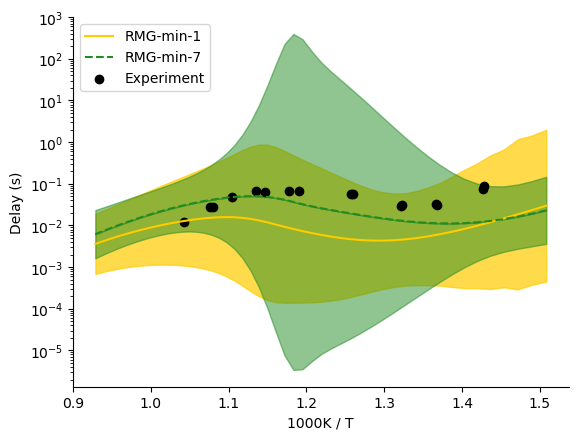

In [6]:
mech_dirs = [
    '/home/moon/autoscience/fuels/butane_20240126',
    '/home/moon/autoscience/fuels/butane_20240501',
]

start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
colors = [start_color, end_color]
labels = ['RMG-min-1', 'RMG-min-7']
alphas = [0.7, 0.5]
linestyles = ['solid', 'dashed']

for m, mech_dir in enumerate(mech_dirs):
    # Load the analysis files
    analysis_dir = os.path.join(mech_dir, 'analysis')
    total_uncertainty_mat = np.load(os.path.join(analysis_dir, 'total_uncertainty_mat.npy'))
    dft_uncertainty_mat = np.load(os.path.join(analysis_dir, 'dft_uncertainty_mat.npy'))
    first_derivative = np.load(os.path.join(analysis_dir, 'first_derivative.npy'))
    improvement_score = np.load(os.path.join(analysis_dir, 'improvement_score.npy'))
    base_delay_file = os.path.join(mech_dir, 'total_base_delays.npy')
    base_delays = np.load(base_delay_file)
    
    delta_uncertainty_squared = np.float_power(total_uncertainty_mat, 2.0) - np.float_power(dft_uncertainty_mat, 2.0)
    sensitivity_squared = np.float_power(first_derivative, 2.0)
    improvement_score = np.multiply(delta_uncertainty_squared, sensitivity_squared)
    avg_improvement_score = np.nanmean(improvement_score, axis=1)
    avg_improvement_score[np.isnan(avg_improvement_score)] = -np.inf
    improvement_score[np.isnan(improvement_score)] = -np.inf
    total_uncertainty_squared = np.nansum(np.multiply(sensitivity_squared, np.float_power(total_uncertainty_mat, 2.0)), axis=0)
    total_uncertainty = np.array(np.float_power(total_uncertainty_squared, 0.5)).ravel()

    
    # fetch the Table 7 results
    Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
    Tmin = 663
    K = 51
    temperatures = np.linspace(Tmin, Tmax, K)

    table_index = 7


    base_delays7 = base_delays[(table_index - 1) * K: table_index * K]
    total_uncertainty7 = np.array(total_uncertainty[(table_index - 1) * K: table_index * K])

    upper_bound_stddev = np.exp(np.log(base_delays7) + total_uncertainty7)
    lower_bound_stddev = np.exp(np.log(base_delays7) - total_uncertainty7)

    # plot the first mech and uncertainty
    plt.plot(1000.0 / temperatures, base_delays7, color=colors[m], label=labels[m], linestyle=linestyles[m])


    # Local Uncertainty
    plt.fill_between(1000.0 / temperatures, base_delays7, upper_bound_stddev, alpha=alphas[m], color=colors[m])
    plt.fill_between(1000.0 / temperatures, lower_bound_stddev, base_delays7, alpha=alphas[m], color=colors[m])



plt.scatter(1000.0 / T7, tau7 / 1000.0, color='black', label='Experiment')


ax = plt.gca()
ax.set_yscale('log')

ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=999, subs="auto"))

ax.set_yticks([1.E-5,1.E-4,1.E-3,1.E-2,1.E-1,1.E0,1.E1,1.E2,1.E3])

plt.legend()
plt.xlabel('1000K / T')
plt.ylabel(r'Delay (s)')
plt.legend(loc='upper left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
plt.savefig('local_uncertainty_min.pdf', bbox_inches='tight')


/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice


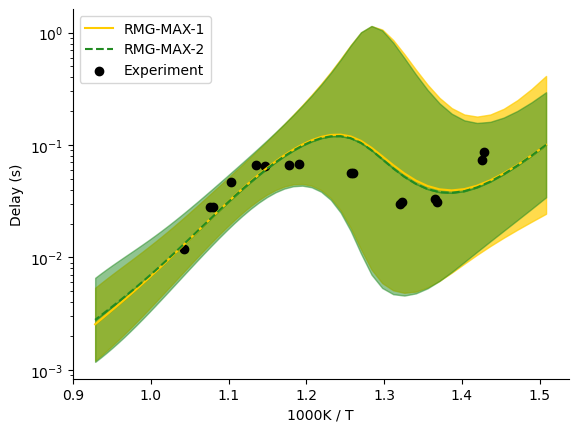

In [7]:
# Repeat for RMG-MAX
mech_dirs = [
    '/home/moon/autoscience/fuels/with_lib/butane_20240401',
    '/home/moon/autoscience/fuels/with_lib/butane_20240413',
]

start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
colors = [start_color, end_color]
labels = ['RMG-MAX-1', 'RMG-MAX-2']
alphas = [0.7, 0.5]
linestyles = ['solid', 'dashed']

for m, mech_dir in enumerate(mech_dirs):
    # Load the analysis files
    analysis_dir = os.path.join(mech_dir, 'analysis')
    total_uncertainty_mat = np.load(os.path.join(analysis_dir, 'total_uncertainty_mat.npy'))
    dft_uncertainty_mat = np.load(os.path.join(analysis_dir, 'dft_uncertainty_mat.npy'))
    first_derivative = np.load(os.path.join(analysis_dir, 'first_derivative.npy'))
    improvement_score = np.load(os.path.join(analysis_dir, 'improvement_score.npy'))
    base_delay_file = os.path.join(mech_dir, 'total_base_delays.npy')
    base_delays = np.load(base_delay_file)
    
    delta_uncertainty_squared = np.float_power(total_uncertainty_mat, 2.0) - np.float_power(dft_uncertainty_mat, 2.0)
    sensitivity_squared = np.float_power(first_derivative, 2.0)
    improvement_score = np.multiply(delta_uncertainty_squared, sensitivity_squared)
    avg_improvement_score = np.nanmean(improvement_score, axis=1)
    avg_improvement_score[np.isnan(avg_improvement_score)] = -np.inf
    improvement_score[np.isnan(improvement_score)] = -np.inf
    total_uncertainty_squared = np.nansum(np.multiply(sensitivity_squared, np.float_power(total_uncertainty_mat, 2.0)), axis=0)
    total_uncertainty = np.array(np.float_power(total_uncertainty_squared, 0.5)).ravel()

    
    # fetch the Table 7 results
    Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
    Tmin = 663
    K = 51
    temperatures = np.linspace(Tmin, Tmax, K)

    table_index = 7


    base_delays7 = base_delays[(table_index - 1) * K: table_index * K]
    total_uncertainty7 = np.array(total_uncertainty[(table_index - 1) * K: table_index * K])

    upper_bound_stddev = np.exp(np.log(base_delays7) + total_uncertainty7)
    lower_bound_stddev = np.exp(np.log(base_delays7) - total_uncertainty7)

    # plot the first mech and uncertainty
    plt.plot(1000.0 / temperatures, base_delays7, color=colors[m], label=labels[m], linestyle=linestyles[m])


    # Local Uncertainty
    plt.fill_between(1000.0 / temperatures, base_delays7, upper_bound_stddev, alpha=alphas[m], color=colors[m])
    plt.fill_between(1000.0 / temperatures, lower_bound_stddev, base_delays7, alpha=alphas[m], color=colors[m])



plt.scatter(1000.0 / T7, tau7 / 1000.0, color='black', label='Experiment')


ax = plt.gca()
ax.set_yscale('log')


plt.legend()
plt.xlabel('1000K / T')
plt.ylabel(r'Delay (s)')
plt.legend(loc='upper left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
plt.savefig('local_uncertainty_max.pdf', bbox_inches='tight')


# Do as a single figure

/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/home/moon/anaconda3/envs/rmg_env/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


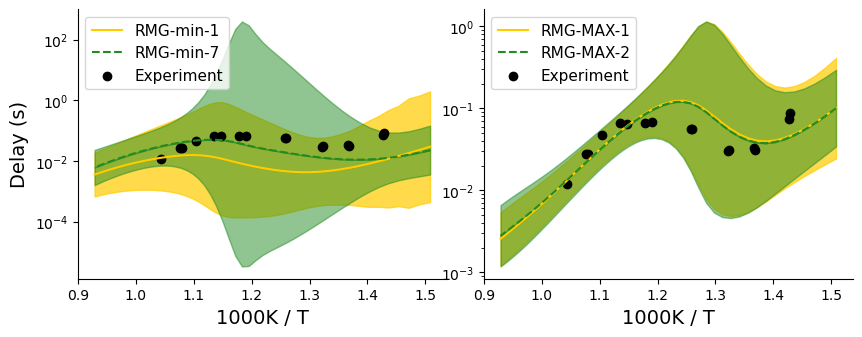

In [31]:
# plot the thing as a 1x3
fontsize = 14

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))

mech_dirs = [
    '/home/moon/autoscience/fuels/butane_20240126',
    '/home/moon/autoscience/fuels/butane_20240501',
]

start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
colors = [start_color, end_color]
labels = ['RMG-min-1', 'RMG-min-7']
alphas = [0.7, 0.5]
linestyles = ['solid', 'dashed']

for m, mech_dir in enumerate(mech_dirs):
    # Load the analysis files
    analysis_dir = os.path.join(mech_dir, 'analysis')
    total_uncertainty_mat = np.load(os.path.join(analysis_dir, 'total_uncertainty_mat.npy'))
    dft_uncertainty_mat = np.load(os.path.join(analysis_dir, 'dft_uncertainty_mat.npy'))
    first_derivative = np.load(os.path.join(analysis_dir, 'first_derivative.npy'))
    improvement_score = np.load(os.path.join(analysis_dir, 'improvement_score.npy'))
    base_delay_file = os.path.join(mech_dir, 'total_base_delays.npy')
    base_delays = np.load(base_delay_file)
    
    delta_uncertainty_squared = np.float_power(total_uncertainty_mat, 2.0) - np.float_power(dft_uncertainty_mat, 2.0)
    sensitivity_squared = np.float_power(first_derivative, 2.0)
    improvement_score = np.multiply(delta_uncertainty_squared, sensitivity_squared)
    avg_improvement_score = np.nanmean(improvement_score, axis=1)
    avg_improvement_score[np.isnan(avg_improvement_score)] = -np.inf
    improvement_score[np.isnan(improvement_score)] = -np.inf
    total_uncertainty_squared = np.nansum(np.multiply(sensitivity_squared, np.float_power(total_uncertainty_mat, 2.0)), axis=0)
    total_uncertainty = np.array(np.float_power(total_uncertainty_squared, 0.5)).ravel()

    
    # fetch the Table 7 results
    Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
    Tmin = 663
    K = 51
    temperatures = np.linspace(Tmin, Tmax, K)

    table_index = 7


    base_delays7 = base_delays[(table_index - 1) * K: table_index * K]
    total_uncertainty7 = np.array(total_uncertainty[(table_index - 1) * K: table_index * K])

    upper_bound_stddev = np.exp(np.log(base_delays7) + total_uncertainty7)
    lower_bound_stddev = np.exp(np.log(base_delays7) - total_uncertainty7)

    # plot the first mech and uncertainty
    axes[0].plot(1000.0 / temperatures, base_delays7, color=colors[m], label=labels[m], linestyle=linestyles[m])


    # Local Uncertainty
    axes[0].fill_between(1000.0 / temperatures, base_delays7, upper_bound_stddev, alpha=alphas[m], color=colors[m])
    axes[0].fill_between(1000.0 / temperatures, lower_bound_stddev, base_delays7, alpha=alphas[m], color=colors[m])



axes[0].scatter(1000.0 / T7, tau7 / 1000.0, color='black', label='Experiment')


# ax = plt.gca()
axes[0].set_yscale('log')

# axes[0].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=999, subs="auto"))
# axes[0].set_yticks([1.E-5,1.E-4,1.E-3,1.E-2,1.E-1,1.E0,1.E1,1.E2,1.E3])

# axes[0].legend()
axes[0].set_xlabel('1000K / T', fontsize=fontsize)
axes[0].set_ylabel(r'Delay (s)', fontsize=fontsize)
axes[0].legend(loc='upper left', fontsize=11)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
    




# # -----------------------------------------------------------------------

# Repeat for RMG-MAX
mech_dirs = [
    '/home/moon/autoscience/fuels/with_lib/butane_20240401',
    '/home/moon/autoscience/fuels/with_lib/butane_20240413',
]

start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
colors = [start_color, end_color]
labels = ['RMG-MAX-1', 'RMG-MAX-2']
alphas = [0.7, 0.5]
linestyles = ['solid', 'dashed']

for m, mech_dir in enumerate(mech_dirs):
    # Load the analysis files
    analysis_dir = os.path.join(mech_dir, 'analysis')
    total_uncertainty_mat = np.load(os.path.join(analysis_dir, 'total_uncertainty_mat.npy'))
    dft_uncertainty_mat = np.load(os.path.join(analysis_dir, 'dft_uncertainty_mat.npy'))
    first_derivative = np.load(os.path.join(analysis_dir, 'first_derivative.npy'))
    improvement_score = np.load(os.path.join(analysis_dir, 'improvement_score.npy'))
    base_delay_file = os.path.join(mech_dir, 'total_base_delays.npy')
    base_delays = np.load(base_delay_file)
    
    delta_uncertainty_squared = np.float_power(total_uncertainty_mat, 2.0) - np.float_power(dft_uncertainty_mat, 2.0)
    sensitivity_squared = np.float_power(first_derivative, 2.0)
    improvement_score = np.multiply(delta_uncertainty_squared, sensitivity_squared)
    avg_improvement_score = np.nanmean(improvement_score, axis=1)
    avg_improvement_score[np.isnan(avg_improvement_score)] = -np.inf
    improvement_score[np.isnan(improvement_score)] = -np.inf
    total_uncertainty_squared = np.nansum(np.multiply(sensitivity_squared, np.float_power(total_uncertainty_mat, 2.0)), axis=0)
    total_uncertainty = np.array(np.float_power(total_uncertainty_squared, 0.5)).ravel()

    
    # fetch the Table 7 results
    Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
    Tmin = 663
    K = 51
    temperatures = np.linspace(Tmin, Tmax, K)

    table_index = 7


    base_delays7 = base_delays[(table_index - 1) * K: table_index * K]
    total_uncertainty7 = np.array(total_uncertainty[(table_index - 1) * K: table_index * K])

    upper_bound_stddev = np.exp(np.log(base_delays7) + total_uncertainty7)
    lower_bound_stddev = np.exp(np.log(base_delays7) - total_uncertainty7)

    # plot the first mech and uncertainty
    axes[1].plot(1000.0 / temperatures, base_delays7, color=colors[m], label=labels[m], linestyle=linestyles[m])


    # Local Uncertainty
    axes[1].fill_between(1000.0 / temperatures, base_delays7, upper_bound_stddev, alpha=alphas[m], color=colors[m])
    axes[1].fill_between(1000.0 / temperatures, lower_bound_stddev, base_delays7, alpha=alphas[m], color=colors[m])



axes[1].scatter(1000.0 / T7, tau7 / 1000.0, color='black', label='Experiment')


axes[1] = plt.gca()
axes[1].set_yscale('log')


axes[1].legend()
axes[1].set_xlabel('1000K / T', fontsize=fontsize)
axes[1].legend(loc='upper left', fontsize=11)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
plt.subplots_adjust(wspace=0.1)


plt.savefig('1x2_local_uncertainty.svg', bbox_inches='tight')


